# CAS_Project - Contribution HUC

Goal: Regression Covid-Cases per 100'000 / GDP AND Regression Covid-Death per 100'000 / GDP

To Do: 
Regression for a single country. E.g. Covid19_Germany_"Death per 100k" and DAX


- India
- Brasil
- France
- USA
- Canada
- Japan
- China (Index: Shanghai)
- Germany




Used Modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from numpy import cov
#from urllib.request import urlopen
#from sklearn import datasets



## Import Data

### Covid Data


In [2]:
# csv der Coviddaten einlesen

df_Covid19 = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/112XdQsa') # https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases
df_Covid19.head(3) #test

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,23/09/2020,23,9,2020,71,2,Afghanistan,AF,AFG,38041757.0,Asia,1.642931
1,22/09/2020,22,9,2020,30,3,Afghanistan,AF,AFG,38041757.0,Asia,1.524640
2,21/09/2020,21,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.698134


In [3]:
df_Covid19.shape

(44554, 12)

In [4]:
df_Covid19=df_Covid19.rename(columns={'dateRep': 'Date', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'cases(14days)/100k'})
df_Covid19['Date'] = pd.to_datetime(df_Covid19['Date'],dayfirst=True) # necessary? When date leq 12 -> display of date (combination month, day) is incorrect... fixed
df_Covid19.head(3)

,Date,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,cases(14days)/100k
0,2020-09-23,23,9,2020,71,2,Afghanistan,AF,AFG,38041757.0,Asia,1.642931
1,2020-09-22,22,9,2020,30,3,Afghanistan,AF,AFG,38041757.0,Asia,1.524640
2,2020-09-21,21,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.698134


In [5]:
#Select rows for selected countries and coloumns date, cases, deaths, Cummulative Nuber per 100k....
df_Covid_Selection = df_Covid19[df_Covid19['countriesAndTerritories'].isin(['India', 'Brazil','France','United_States_of_America','Canada','Japan','China','Germany'])]
df_Covid_Selection.shape

(2143, 12)

In [6]:
df_Covid_Selection=df_Covid_Selection[['Date','cases','deaths','countriesAndTerritories', 'cases(14days)/100k']]

In [7]:
# Change the NaN in Cases per 100k to 0 for further computing
df_Covid_Selection['cases(14days)/100k'] = df_Covid_Selection['cases(14days)/100k'].fillna(0) 

In [8]:
df_Covid_Selection.sort_index()
df_Covid_Selection.head(3)

,Date,cases,deaths,countriesAndTerritories,cases(14days)/100k
5777,2020-09-23,33536,836,Brazil,203.521430
5778,2020-09-22,13439,377,Brazil,194.397032
5779,2020-09-21,16389,363,Brazil,192.896910


In [9]:
df_Covid_Brazil = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Brazil'])]
df_Covid_Brazil = df_Covid_Brazil[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Brazil = df_Covid_Brazil.rename(columns={'cases': 'cases_Brazil', 'deaths': 'deaths_Brazil', 'cases(14days)/100k' :'cases(14days)/100k_Brazil'})

df_Covid_Brazil

,Date,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil
5777,2020-09-23,33536,836,203.521430
5778,2020-09-22,13439,377,194.397032
5779,2020-09-21,16389,363,192.896910
5780,2020-09-20,33057,739,192.011809
5781,2020-09-19,39797,858,190.642936
...,...,...,...,...
6040,2020-01-04,0,0,0.000000
6041,2020-01-03,0,0,0.000000
6042,2020-01-02,0,0,0.000000
6043,2020-01-01,0,0,0.000000


In [10]:

df_Covid_Canada = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Canada'])]
df_Covid_Canada = df_Covid_Canada[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Canada = df_Covid_Canada.rename(columns={'cases': 'cases_Canada', 'deaths': 'deaths_Canada', 'cases(14days)/100k' :'cases(14days)/100k_Canada'})


In [11]:
df_Covid_Canada.head(3)

,Date,cases_Canada,deaths_Canada,cases(14days)/100k_Canada
7446,2020-09-23,1248,6,34.521897
7447,2020-09-22,1766,11,35.478834
7448,2020-09-21,875,6,31.418535


In [12]:

df_Covid_China = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['China'])]
df_Covid_China = df_Covid_China[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_China = df_Covid_China.rename(columns={'cases': 'cases_China', 'deaths': 'deaths_China', 'cases(14days)/100k' :'cases(14days)/100k_China'})

df_Covid_France = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['France'])]
df_Covid_France = df_Covid_France[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_France = df_Covid_France.rename(columns={'cases': 'cases_France', 'deaths': 'deaths_France', 'cases(14days)/100k' :'cases(14days)/100k_France'})

df_Covid_Germany = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Germany'])]
df_Covid_Germany =df_Covid_Germany[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Germany = df_Covid_Germany.rename(columns={'cases': 'cases_Germany', 'deaths': 'deaths_Germany', 'cases(14days)/100k' :'cases(14days)/100k_Germany'})

df_Covid_India = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['India'])]
df_Covid_India = df_Covid_India[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_India = df_Covid_India.rename(columns={'cases': 'cases_India', 'deaths': 'deaths_India', 'cases(14days)/100k' :'cases(14days)/100k_India'})

df_Covid_Japan = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['Japan'])]
df_Covid_Japan = df_Covid_Japan[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_Japan = df_Covid_Japan.rename(columns={'cases': 'cases_Japan', 'deaths': 'deaths_Japan', 'cases(14days)/100k' :'cases(14days)/100k_Japan'})

df_Covid_USA = df_Covid_Selection[df_Covid_Selection['countriesAndTerritories'].isin(['United_States_of_America'])]
df_Covid_USA = df_Covid_USA[['Date','cases','deaths','cases(14days)/100k']]
df_Covid_USA = df_Covid_USA.rename(columns={'cases': 'cases_USA', 'deaths': 'deaths_USA', 'cases(14days)/100k' :'cases(14days)/100k_USA'})


# Indices

In [13]:
#csv der Indices einlesen
df_BSESN = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^BSESN.csv') # BSESN Bombay Stock Ehange Sensitivity Index Composite --> India
df_BSESN['Name']='BSESN' 

df_BVSP = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^BVSP.csv') # BVSP Composite -> Brasil
df_BVSP['Name']='BVSP'

df_FCHI = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^FCHI.csv') # FCHI Composite -> France
df_FCHI['Name']='FCHI'

df_GSPC = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^GSPC.csv') # GSPC Composite -> USA
df_GSPC['Name']='GSPC'

df_GSPTE = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^GSPTSE.csv') # GSPTE Composite -> Canada
df_GSPTE['Name']='GSPTE'

df_N225 = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^N225.csv') # N225 Composite -> Japan
df_N225['Name']='N225'

#df_SSEC = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/^SSEC.csv') # SSEC Composite -> China (Shanghai)
#df_SSEC['Name']='SSEC'
#Error on yahoo-finance-Site; only 1 row...


df_DAX = pd.read_csv('C:/Users/haema/Documents/DataScience/CAS_Project/DAX.csv') # DAX Composite -> Germany
df_DAX['Name']='DAX'


In [14]:
df_DAX.shape

(254, 8)

In [18]:
#Select coloumns for DAX ....
df_DAX.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Name
251,2020-09-21,28.230000,28.230000,27.503000,27.799999,27.799999,47700,DAX
252,2020-09-22,27.860001,28.027000,27.590000,27.934000,27.934000,5300,DAX
253,2020-09-23,27.860001,27.860001,27.787399,27.559999,27.559999,1663,DAX


In [19]:
df_DAX=df_DAX.rename(columns={'Open': 'Open_DAX', 'High': 'High_DAX', 'Low': 'Low_DAX', 'Close':'Close_DAX', 'Adj Close': 'Adj Close_DAX', 'Volume': 'Volume_DAX'})

In [20]:
df_DAX  = df_DAX[['Date','Adj Close_DAX']]
df_DAX.shape

(254, 2)

In [23]:
df_DAX['Date'] = pd.to_datetime(df_DAX['Date'])
df_DAX.set_index('Date').sort_index()

,Adj Close_DAX
Date,
2019-09-23,25.380625
2019-09-24,25.453772
2019-09-25,25.137453
2019-09-26,25.345037
2019-09-27,25.330210
...,...
2020-09-17,29.309999
2020-09-18,29.101999
2020-09-21,27.799999


In [24]:
df_BSESN=df_BSESN.rename(columns={'Open': 'Open_BSESN', 'High': 'High_BSESN', 'Low': 'Low_BSESN', 'Close':'Close_BSESN', 'Adj Close': 'Adj Close_BSESN', 'Volume': 'Volume_BSESN'})
df_BSESN  = df_BSESN[['Date','Adj Close_BSESN']]
df_BSESN['Date'] = pd.to_datetime(df_BSESN['Date'])
df_BSESN.set_index('Date').sort_index()


,Adj Close_BSESN
Date,
2019-09-23,39090.031250
2019-09-24,39097.140625
2019-09-25,38593.519531
2019-09-26,38989.738281
2019-09-27,38822.570313
...,...
2020-09-17,38979.851563
2020-09-18,38845.820313
2020-09-21,38034.140625


In [28]:
df_BVSP=df_BVSP.rename(columns={'Open': 'Open_BVSP', 'High': 'High_BVSP', 'Low': 'Low_BVSP', 'Close':'Close_BVSP', 'Adj Close': 'Adj Close_BVSP', 'Volume': 'Volume_BVSP'})
df_BVSP  = df_BVSP[['Date','Adj Close_BVSP']]
df_BVSP['Date'] = pd.to_datetime(df_BVSP['Date'])
df_BVSP.set_index('Date').sort_index()

,Adj Close_BVSP
Date,
2019-09-23,104638.000000
2019-09-24,103876.000000
2019-09-25,104481.000000
2019-09-26,105319.000000
2019-09-27,105078.000000
...,...
2020-09-17,100098.000000
2020-09-18,98290.000000
2020-09-21,96991.000000


In [29]:
df_FCHI=df_FCHI.rename(columns={'Open': 'Open_FCHI', 'High': 'High_FCHI', 'Low': 'Low_FCHI', 'Close':'Close_FCHI', 'Adj Close': 'Adj Close_FCHI', 'Volume': 'Volume_FCHI'})
df_FCHI  = df_FCHI[['Date','Adj Close_FCHI']]
df_FCHI['Date'] = pd.to_datetime(df_FCHI['Date'])
df_FCHI.set_index('Date').sort_index()

,Adj Close_FCHI
Date,
2019-09-23,5630.759766
2019-09-24,5628.330078
2019-09-25,5583.799805
2019-09-26,5620.569824
2019-09-27,5640.580078
...,...
2020-09-17,5039.500000
2020-09-18,4978.180176
2020-09-21,4792.040039


In [30]:

df_GSPC=df_GSPC.rename(columns={'Open': 'Open_GSPC', 'High': 'High_GSPC', 'Low': 'Low_GSPC', 'Close':'Close_GSPC', 'Adj Close': 'Adj Close_GSPC', 'Volume': 'Volume_GSPC'})
df_GSPC  = df_GSPC[['Date','Adj Close_GSPC']]
df_GSPC['Date'] = pd.to_datetime(df_GSPC['Date'])
df_GSPC.set_index('Date').sort_index()


,Adj Close_GSPC
Date,
2019-09-23,2991.780029
2019-09-24,2966.600098
2019-09-25,2984.870117
2019-09-26,2977.620117
2019-09-27,2961.790039
...,...
2020-09-17,3357.010010
2020-09-18,3319.469971
2020-09-21,3281.060059


In [31]:

df_GSPTE=df_GSPTE.rename(columns={'Open': 'Open_GSPTE', 'High': 'High_GSPTE', 'Low': 'Low_GSPTE', 'Close':'Close_GSPTE', 'Adj Close': 'Adj Close_GSPTE', 'Volume': 'Volume_GSPTE'})
df_GSPTE  = df_GSPTE[['Date','Adj Close_GSPTE']]
df_GSPTE['Date'] = pd.to_datetime(df_GSPTE['Date'])
df_GSPTE.set_index('Date').sort_index()


,Adj Close_GSPTE
Date,
2019-09-23,16867.199219
2019-09-24,16798.300781
2019-09-25,16784.300781
2019-09-26,16790.400391
2019-09-27,16694.300781
...,...
2020-09-17,16246.700195
2020-09-18,16199.000000
2020-09-21,15981.799805


In [32]:

df_N225=df_N225.rename(columns={'Open': 'Open_N225', 'High': 'High_N225', 'Low': 'Low_N225', 'Close':'Close_N225', 'Adj Close': 'Adj Close_N225', 'Volume': 'Volume_N225'})
df_N225  = df_N225[['Date','Adj Close_N225']]
df_N225['Date'] = pd.to_datetime(df_N225['Date'])
df_N225.set_index('Date').sort_index()


,Adj Close_N225
Date,
2019-09-24,22098.839844
2019-09-25,22020.150391
2019-09-26,22048.240234
2019-09-27,21878.900391
2019-09-30,21755.839844
...,...
2020-09-15,23454.890625
2020-09-16,23475.529297
2020-09-17,23319.369141


In [ ]:
# As data for SSEC is faulty, drop from project
#df_SSEC = df_SSEC.rename(columns={'Open': 'Open_SSEC', 'High': 'High_SSEC', 'Low': 'Low_SSEC', 'Close':'Close_SSEC', 'Adj Close': 'Adj Close_SSEC', 'Volume': 'Volume_SSEC'})
#df_SSEC  = df_SSEC[['Date','Adj Close_SSEC']]
#df_SSEC['Date'] = pd.to_datetime(df_SSEC['Date'])
#df_SSEC.set_index('Date').sort_index()

# Combining Covid Data and Indices

In [33]:
## pd.merge combines two series resp. dataframes according to their index. However, it is not able to combine more than two. Thus, I chose an iterative way
df_Covid_Date=df_Covid_China[['Date',]]
df_Covid_Date # to create a date vector to merge the different data frames
df_Date=df_Covid_Date.set_index('Date').sort_index()
df_Date

""
Date
2019-12-31
2020-01-01
2020-01-02
2020-01-03
2020-01-04
...
2020-09-19
2020-09-20
2020-09-21


In [35]:
df_combined = pd.merge(df_Date, df_DAX, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_BSESN, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_BVSP, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_FCHI, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_GSPC, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_GSPTE, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_N225, on='Date', how='outer', validate='one_to_many').set_index('Date').sort_index()


In [36]:
df_combined.shape


(340, 7)

In [37]:
df_combined.tail(10)

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225
Date,,,,,,,
2020-09-14,29.329000,38756.628906,100275.000000,5051.879883,3383.540039,16360.099609,23559.300781
2020-09-15,28.920000,39044.351563,100298.000000,5067.930176,3401.199951,16431.300781,23454.890625
2020-09-16,29.330000,39302.851563,99676.000000,5074.419922,3385.489990,16295.700195,23475.529297
2020-09-17,29.309999,38979.851563,100098.000000,5039.500000,3357.010010,16246.700195,23319.369141
2020-09-18,29.101999,38845.820313,98290.000000,4978.180176,3319.469971,16199.000000,23360.300781
2020-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-21,27.799999,38034.140625,96991.000000,4792.040039,3281.060059,15981.799805,NaN
2020-09-22,27.934000,37734.078125,97294.000000,4772.839844,3315.570068,16142.900391,NaN


In [38]:
df_combined = pd.merge(df_combined, df_Covid_Brazil, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_Covid_Canada, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_Covid_China, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_Covid_France, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_Covid_Germany, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_Covid_India, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_Covid_Japan, on='Date', how='outer', validate='one_to_many').set_index('Date')
df_combined = pd.merge(df_combined, df_Covid_USA, on='Date', how='outer', validate='one_to_many').set_index('Date')


In [39]:
df_combined.shape

(340, 31)

In [40]:
df_combined.tail(10)

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,...,cases(14days)/100k_Germany,cases_India,deaths_India,cases(14days)/100k_India,cases_Japan,deaths_Japan,cases(14days)/100k_Japan,cases_USA,deaths_USA,cases(14days)/100k_USA
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-14,29.329000,38756.628906,100275.000000,5051.879883,3383.540039,16360.099609,23559.300781,14768.0,415.0,221.817137,...,21.650410,92071.0,1136.0,89.663794,439.0,3.0,6.142190,33871.0,378.0,158.879289
2020-09-15,28.920000,39044.351563,100298.000000,5067.930176,3401.199951,16431.300781,23454.890625,15155.0,381.0,207.220562,...,21.878068,83809.0,1054.0,90.680174,301.0,9.0,5.964041,34841.0,451.0,159.180445
2020-09-16,29.330000,39302.851563,99676.000000,5074.419922,3385.489990,16295.700195,23475.529297,36653.0,1113.0,204.374785,...,22.654997,90123.0,1290.0,91.541258,490.0,10.0,5.870237,51473.0,1407.0,161.257239
2020-09-17,29.309999,38979.851563,100098.000000,5039.500000,3357.010010,16246.700195,23319.369141,36820.0,987.0,199.582544,...,23.718606,97894.0,1132.0,92.566640,561.0,12.0,5.841071,24598.0,865.0,156.955352
2020-09-18,29.101999,38845.820313,98290.000000,4978.180176,3319.469971,16199.000000,23360.300781,36303.0,829.0,196.043091,...,24.276308,96424.0,1174.0,93.524107,485.0,9.0,5.696029,43567.0,831.0,159.179230
2020-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39797.0,858.0,190.642936,...,25.383281,93337.0,1247.0,94.029443,579.0,13.0,5.673170,50209.0,956.0,158.917275
2020-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33057.0,739.0,192.011809,...,25.813302,92605.0,1133.0,94.173835,584.0,5.0,5.705489,40295.0,669.0,157.748813
2020-09-21,27.799999,38034.140625,96991.000000,4792.040039,3281.060059,15981.799805,NaN,16389.0,363.0,192.896910,...,25.943392,86961.0,1130.0,93.892735,0.0,0.0,5.361015,39852.0,251.0,160.574091
2020-09-22,27.934000,37734.078125,97294.000000,4772.839844,3315.570068,16142.900391,NaN,13439.0,377.0,194.397032,...,26.331254,75083.0,1053.0,93.839603,781.0,8.0,5.678688,53153.0,372.0,169.357464


## Plotting



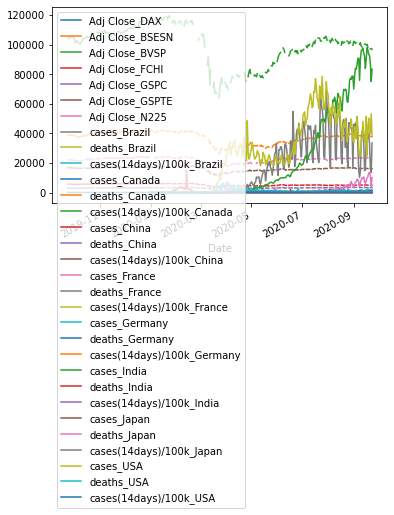

In [41]:
df_combined.plot()
plt.show()

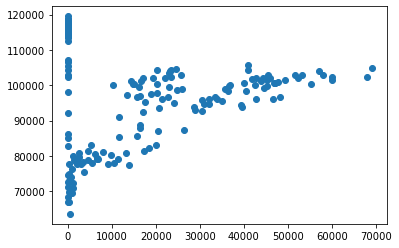

In [43]:
#df_combined['deaths_Brazil'].plot()
#df_combined['Adj Close_BVSP'].plot()
#df_combined['Volume_BVSP'].plot()
#plt.show()



plt.scatter(df_combined['cases_Brazil'], df_combined['Adj Close_BVSP'])
plt.show()


In [45]:
##plt.hist(df_combined['cases_Brazil'], df_combined['Adj Close_BVSP'])
##plt.show()


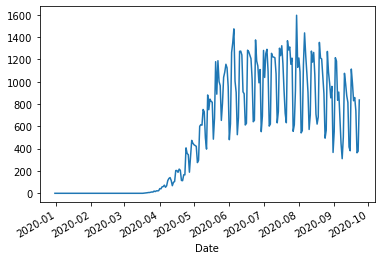

In [59]:
df_combined['deaths_Brazil'].plot()
plt.show()

## Correlations, etc.

In [47]:
df_combined.corr()

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,...,cases(14days)/100k_Germany,cases_India,deaths_India,cases(14days)/100k_India,cases_Japan,deaths_Japan,cases(14days)/100k_Japan,cases_USA,deaths_USA,cases(14days)/100k_USA
Adj Close_DAX,1.000000,0.848012,0.862255,0.697666,0.940460,0.880194,0.956209,0.469007,0.331967,0.561486,...,-0.520779,0.580546,0.563153,0.571185,0.312617,-0.190341,0.355555,0.262651,-0.274839,0.327577
Adj Close_BSESN,0.848012,1.000000,0.963906,0.902556,0.742623,0.936336,0.862593,0.095070,-0.089656,0.152689,...,-0.606884,0.287633,0.220221,0.289146,0.104660,-0.268711,0.126666,-0.108004,-0.467479,-0.050405
Adj Close_BVSP,0.862255,0.963906,1.000000,0.932365,0.762425,0.954927,0.897451,0.111789,-0.031587,0.155067,...,-0.643464,0.182996,0.160157,0.179160,0.046326,-0.322312,0.031160,-0.106903,-0.477162,-0.062188
Adj Close_FCHI,0.697666,0.902556,0.932365,1.000000,0.558239,0.895334,0.803868,-0.158693,-0.256138,-0.151497,...,-0.580806,-0.089597,-0.117916,-0.086344,-0.196996,-0.353686,-0.217689,-0.367552,-0.523170,-0.345024
Adj Close_GSPC,0.940460,0.742623,0.762425,0.558239,1.000000,0.836496,0.883549,0.438649,0.324223,0.524678,...,-0.498674,0.560458,0.535392,0.555017,0.319223,-0.095638,0.393233,0.233158,-0.193002,0.320329
Adj Close_GSPTE,0.880194,0.936336,0.954927,0.895334,0.836496,1.000000,0.913742,0.135241,0.033926,0.181445,...,-0.597495,0.233972,0.202289,0.234161,0.078974,-0.204308,0.111929,-0.082757,-0.352778,-0.008358
Adj Close_N225,0.956209,0.862593,0.897451,0.803868,0.883549,0.913742,1.000000,0.361762,0.280912,0.430972,...,-0.582538,0.414290,0.419932,0.412965,0.125095,-0.185360,0.179700,0.112125,-0.306230,0.176323
cases_Brazil,0.469007,0.095070,0.111789,-0.158693,0.438649,0.135241,0.361762,1.000000,0.910040,0.902446,...,-0.135233,0.712444,0.790529,0.670351,0.598442,0.088126,0.593626,0.819540,0.300077,0.801377
deaths_Brazil,0.331967,-0.089656,-0.031587,-0.256138,0.324223,0.033926,0.280912,0.910040,1.000000,0.821847,...,-0.124575,0.554391,0.673402,0.516445,0.443995,0.186600,0.445541,0.766290,0.418418,0.753718
cases(14days)/100k_Brazil,0.561486,0.152689,0.155067,-0.151497,0.524678,0.181445,0.430972,0.902446,0.821847,1.000000,...,-0.138855,0.821518,0.882453,0.795649,0.653268,0.070011,0.699565,0.841452,0.197129,0.877832


In [56]:
#for calculation, try various solutions. 
# NaN as 0

df_combined_DropNA = df_combined.dropna()

df_combined_0 = df_combined.fillna(0)

df_combined_1e20 = df_combined.fillna(1e20)

In [55]:
df_combined_DropNA.corr()

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,...,cases(14days)/100k_Germany,cases_India,deaths_India,cases(14days)/100k_India,cases_Japan,deaths_Japan,cases(14days)/100k_Japan,cases_USA,deaths_USA,cases(14days)/100k_USA
Adj Close_DAX,1.000000,0.865929,0.863864,0.712572,0.973515,0.887528,0.959103,0.475611,0.335805,0.569953,...,-0.491295,0.592145,0.574615,0.586465,0.338943,-0.162825,0.388925,0.284303,-0.235041,0.360200
Adj Close_BSESN,0.865929,1.000000,0.959977,0.876509,0.856636,0.935442,0.855468,0.129337,-0.056090,0.190244,...,-0.593211,0.323116,0.255442,0.325907,0.144554,-0.225925,0.179503,-0.071266,-0.422756,0.001635
Adj Close_BVSP,0.863864,0.959977,1.000000,0.938637,0.844122,0.955935,0.887163,0.107286,-0.039350,0.153962,...,-0.637010,0.188011,0.165355,0.186145,0.057243,-0.309231,0.047026,-0.093165,-0.459144,-0.043258
Adj Close_FCHI,0.712572,0.876509,0.938637,1.000000,0.699763,0.901191,0.803351,-0.148397,-0.244729,-0.131240,...,-0.566649,-0.067151,-0.090726,-0.063385,-0.177642,-0.330913,-0.188610,-0.335610,-0.498976,-0.310058
Adj Close_GSPC,0.973515,0.856636,0.844122,0.699763,1.000000,0.912576,0.940284,0.450577,0.329947,0.530064,...,-0.471788,0.571245,0.545959,0.568746,0.347127,-0.070395,0.424250,0.249692,-0.153595,0.347749
Adj Close_GSPTE,0.887528,0.935442,0.955935,0.901191,0.912576,1.000000,0.914806,0.154196,0.047441,0.197813,...,-0.577604,0.254010,0.222782,0.255498,0.115355,-0.179804,0.151935,-0.049999,-0.315306,0.032724
Adj Close_N225,0.959103,0.855468,0.887163,0.803351,0.940284,0.914806,1.000000,0.352670,0.269027,0.424629,...,-0.544351,0.412658,0.417280,0.410681,0.156510,-0.187155,0.198862,0.138743,-0.269397,0.201333
cases_Brazil,0.475611,0.129337,0.107286,-0.148397,0.450577,0.154196,0.352670,1.000000,0.907448,0.886357,...,-0.105331,0.712439,0.777660,0.678627,0.636255,0.081970,0.617584,0.810389,0.332120,0.794016
deaths_Brazil,0.335805,-0.056090,-0.039350,-0.244729,0.329947,0.047441,0.269027,0.907448,1.000000,0.793039,...,-0.104100,0.548061,0.663852,0.516456,0.475905,0.152887,0.453874,0.743714,0.436355,0.729096
cases(14days)/100k_Brazil,0.569953,0.190244,0.153962,-0.131240,0.530064,0.197813,0.424629,0.886357,0.793039,1.000000,...,-0.118687,0.815411,0.866670,0.797104,0.661870,0.070721,0.709242,0.845626,0.195713,0.890094


In [57]:
df_combined_0.corr()

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,...,cases(14days)/100k_Germany,cases_India,deaths_India,cases(14days)/100k_India,cases_Japan,deaths_Japan,cases(14days)/100k_Japan,cases_USA,deaths_USA,cases(14days)/100k_USA
Adj Close_DAX,1.000000,0.882458,0.880192,0.917230,0.996234,0.925119,0.794108,-0.088709,-0.086817,-0.020960,...,-0.185975,-0.002920,0.009933,0.015977,-0.085035,-0.111763,-0.026157,-0.145530,-0.165218,-0.075535
Adj Close_BSESN,0.882458,1.000000,0.847451,0.904549,0.878027,0.862813,0.758329,-0.113128,-0.118809,-0.046478,...,-0.242382,-0.019098,-0.017593,-0.002141,-0.115716,-0.124614,-0.057533,-0.183269,-0.208333,-0.117189
Adj Close_BVSP,0.880192,0.847451,1.000000,0.901123,0.873087,0.870541,0.786194,-0.125195,-0.134780,-0.067827,...,-0.232311,-0.054114,-0.046386,-0.037179,-0.125207,-0.152020,-0.087175,-0.191888,-0.227349,-0.133060
Adj Close_FCHI,0.917230,0.904549,0.901123,1.000000,0.911505,0.937386,0.813803,-0.203581,-0.202700,-0.146197,...,-0.249281,-0.118868,-0.117547,-0.101406,-0.200249,-0.170272,-0.154314,-0.275757,-0.263387,-0.216298
Adj Close_GSPC,0.996234,0.878027,0.873087,0.911505,1.000000,0.925925,0.793331,-0.095265,-0.082243,-0.030117,...,-0.146614,-0.016035,-0.001243,0.003126,-0.084203,-0.078785,-0.021148,-0.138441,-0.125211,-0.067829
Adj Close_GSPTE,0.925119,0.862813,0.870541,0.937386,0.925925,1.000000,0.801367,-0.147533,-0.140572,-0.103701,...,-0.177012,-0.080551,-0.073201,-0.061765,-0.158851,-0.102298,-0.088747,-0.203896,-0.173042,-0.145161
Adj Close_N225,0.794108,0.758329,0.786194,0.813803,0.793331,0.801367,1.000000,-0.109851,-0.084451,-0.045354,...,-0.136195,-0.055380,-0.050793,-0.043138,-0.126608,-0.106502,-0.077771,-0.166682,-0.143848,-0.111037
cases_Brazil,-0.088709,-0.113128,-0.125195,-0.203581,-0.095265,-0.147533,-0.109851,1.000000,0.923808,0.917443,...,0.014586,0.745126,0.818885,0.706320,0.646004,0.183563,0.646152,0.848411,0.413452,0.833851
deaths_Brazil,-0.086817,-0.118809,-0.134780,-0.202700,-0.082243,-0.140572,-0.084451,0.923808,1.000000,0.852522,...,0.043180,0.610490,0.721377,0.575088,0.517149,0.280399,0.525066,0.814168,0.524761,0.803757
cases(14days)/100k_Brazil,-0.020960,-0.046478,-0.067827,-0.146197,-0.030117,-0.103701,-0.045354,0.917443,0.852522,1.000000,...,0.018196,0.840123,0.898011,0.815885,0.694849,0.171631,0.739057,0.868936,0.333127,0.898376


In [58]:
df_combined_1e20.corr()

,Adj Close_DAX,Adj Close_BSESN,Adj Close_BVSP,Adj Close_FCHI,Adj Close_GSPC,Adj Close_GSPTE,Adj Close_N225,cases_Brazil,deaths_Brazil,cases(14days)/100k_Brazil,...,cases(14days)/100k_Germany,cases_India,deaths_India,cases(14days)/100k_India,cases_Japan,deaths_Japan,cases(14days)/100k_Japan,cases_USA,deaths_USA,cases(14days)/100k_USA
Adj Close_DAX,1.000000,0.879205,0.886111,0.929400,1.000000,0.930254,0.794877,-0.251918,-0.251918,-0.251918,...,-0.251918,-0.254822,-0.254822,-0.254822,-0.251918,-0.251918,-0.251918,-0.251918,-0.251918,-0.251918
Adj Close_BSESN,0.879205,1.000000,0.843018,0.902225,0.879205,0.856586,0.752483,-0.202266,-0.202266,-0.202266,...,-0.202266,-0.205614,-0.205614,-0.205614,-0.202266,-0.202266,-0.202266,-0.202266,-0.202266,-0.202266
Adj Close_BVSP,0.886111,0.843018,1.000000,0.909121,0.886111,0.878669,0.788647,-0.232042,-0.232042,-0.232042,...,-0.232042,-0.235209,-0.235209,-0.235209,-0.232042,-0.232042,-0.232042,-0.232042,-0.232042,-0.232042
Adj Close_FCHI,0.929400,0.902225,0.909121,1.000000,0.929400,0.937728,0.817449,-0.244282,-0.244282,-0.244282,...,-0.244282,-0.247128,-0.247128,-0.247128,-0.244282,-0.244282,-0.244282,-0.244282,-0.244282,-0.244282
Adj Close_GSPC,1.000000,0.879205,0.886111,0.929400,1.000000,0.930254,0.794877,-0.251918,-0.251918,-0.251918,...,-0.251918,-0.254822,-0.254822,-0.254822,-0.251918,-0.251918,-0.251918,-0.251918,-0.251918,-0.251918
Adj Close_GSPTE,0.930254,0.856586,0.878669,0.937728,0.930254,1.000000,0.802447,-0.237956,-0.237956,-0.237956,...,-0.237956,-0.240963,-0.240963,-0.240963,-0.237956,-0.237956,-0.237956,-0.237956,-0.237956,-0.237956
Adj Close_N225,0.794877,0.752483,0.788647,0.817449,0.794877,0.802447,1.000000,-0.250372,-0.250372,-0.250372,...,-0.250372,-0.253675,-0.253675,-0.253675,-0.250372,-0.250372,-0.250372,-0.250372,-0.250372,-0.250372
cases_Brazil,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372,1.000000,1.000000,1.000000,...,1.000000,0.991272,0.991272,0.991272,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
deaths_Brazil,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372,1.000000,1.000000,1.000000,...,1.000000,0.991272,0.991272,0.991272,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
cases(14days)/100k_Brazil,-0.251918,-0.202266,-0.232042,-0.244282,-0.251918,-0.237956,-0.250372,1.000000,1.000000,1.000000,...,1.000000,0.991272,0.991272,0.991272,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
AdjClose=df_combined['Adj Close_DAX']
Cases  = df_combined['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err)

nan nan nan


In [64]:
AdjClose=df_combined_DropNA['Adj Close_DAX']
Cases  = df_combined_DropNA['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err)

-192.4532622428546 5953.426057055953 27.82784677866699


In [61]:
AdjClose=df_combined_1e20['Adj Close_DAX']
Cases  = df_combined_1e20['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err)

-0.23676982237685398 2.7165354330708656e+19 0.04947340293619921


In [62]:
AdjClose=df_combined_0['Adj Close_DAX']
Cases  = df_combined_0['cases_Germany']
slope, intercept, r_value, p_value, std_err = stats.linregress(AdjClose,Cases)
print (slope, intercept, std_err)

-20.286460150281602 1203.6298446312487 5.960851141601025


In [68]:
covariance = cov(df_combined['deaths_Brazil'], df_combined['cases_Brazil'])
covariance

array([[nan, nan],
       [nan, nan]])

In [71]:
covariance_DropNA = cov(df_combined_DropNA['deaths_Brazil'], df_combined_DropNA['cases_Brazil'])
covariance_DropNA

array([[2.55105476e+05, 8.47080972e+06],
       [8.47080972e+06, 3.41575370e+08]])

In [72]:
covariance_0 = cov(df_combined_0['deaths_Brazil'], df_combined['cases_Brazil'])
covariance_0

array([[235219.2460177,            nan],
       [           nan,            nan]])

In [73]:
covariance_1e20 = cov(df_combined_1e20['deaths_Brazil'], df_combined['cases_Brazil'])
covariance_1e20

array([[1.67412806e+39,            nan],
       [           nan,            nan]])

In [75]:
x_values = df_combined['cases(14days)/100k_Germany']

y_values = df_combined['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

nan


In [83]:
x_values = df_combined_DropNA['cases(14days)/100k_Germany']

y_values = df_combined_DropNA['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

0.2413705701067148


In [78]:
x_values = df_combined_0['cases(14days)/100k_Germany']

y_values = df_combined_0['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2

print(r_squared)

0.034586698841599504


In [79]:
x_values = df_combined_1e20['cases(14days)/100k_Germany']

y_values = df_combined_1e20['Adj Close_DAX']

correlation_matrix = np.corrcoef(x_values, y_values)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(r_squared)

0.06346255811220412
